# Notebook for testing and exploring objectives in tesser

In [ ]:
import pandas as pd
import numpy as np
import importlib
from tesser import util
from tesser import fit
from tesser import network
from tesser import sr
from tesser import tasks
from tesser import rsa 
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import pearsonr
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data_dir = "/home/rodrigo/Dropbox/tesser_successor/Data/"


In [9]:
induct_all = util.load_induct(data_dir)

In [10]:
induct_all

,SubjNum,TrialNum,QuestType,Environment,CueNum,CueObject,Opt1Num,Option1,Opt2Num,Option2,Resp,Acc,RT,cue,opt1,opt2,response
0,100,1,Prim,ocean,2,object_23.jpg,16,object_28.jpg,20,object_16.jpg,NaN,0,NaN,1,15,19,NaN
1,100,2,Bound2,desert,4,object_12.jpg,10,object_2.jpg,19,object_4.jpg,2.0,0,2.974157,3,9,18,1.0
2,100,3,Prim,desert,5,object_30.jpg,6,object_18.jpg,2,object_23.jpg,1.0,1,3.190848,4,5,1,0.0
3,100,4,Prim,ocean,2,object_23.jpg,9,object_35.jpg,19,object_4.jpg,2.0,1,3.373906,1,8,18,1.0
4,100,5,Prim,ocean,1,object_6.jpg,19,object_4.jpg,13,object_1.jpg,2.0,0,3.094699,0,18,12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,138,38,Prim,desert,8,object_3.jpg,9,object_16.jpg,21,object_28.jpg,2.0,0,2.025821,7,8,20,1.0
1550,138,39,Prim,forest,14,object_1.jpg,19,object_35.jpg,15,object_6.jpg,2.0,1,1.997691,13,18,14,1.0
1551,138,40,Prim,ocean,21,object_28.jpg,14,object_1.jpg,2,object_36.jpg,2.0,1,1.114204,20,13,1,1.0
1552,138,41,Bound1,forest,11,object_13.jpg,10,object_9.jpg,16,object_30.jpg,1.0,0,0.623270,10,9,15,0.0


In [11]:
# get one subject
struct_all = util.load_struct(data_dir)
struct_all

,SubjNum,run,trial,objnum,file,orientnam,orientnum,resp,respnum,acc,rt,part,seqtype
0,100,1,1,10,object_2.jpg,cor,1.0,c,1.0,1.0,1.426618,1,NaN
1,100,1,2,5,object_30.jpg,cor,1.0,c,1.0,1.0,0.759233,1,NaN
2,100,1,3,4,object_12.jpg,cor,1.0,c,1.0,1.0,0.866177,1,NaN
3,100,1,4,3,object_7.jpg,cor,1.0,c,1.0,1.0,0.712731,1,NaN
4,100,1,5,1,object_6.jpg,cor,1.0,c,1.0,1.0,0.654236,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90904,138,6,145,21,object_28.jpg,cor,1.0,c,1.0,1.0,0.831956,2,1.0
90905,138,6,146,18,object_12.jpg,rot,0.0,n,2.0,1.0,0.839406,2,1.0
90906,138,6,147,17,object_18.jpg,cor,1.0,c,1.0,1.0,0.909276,2,1.0
90907,138,6,148,12,object_34.jpg,cor,1.0,c,1.0,1.0,0.907248,2,1.0


Creating a list of DataFrames to write in a csv file. 

Dataframe includes maximized likelihood parameters for each subject  

In [30]:
# not Fixed 
importlib.reload(fit)
subject_list = util.subj_list()
df_list = []
for sub in subject_list:
    subj_struct = struct_all.query(f'SubjNum == {sub}')
    subj_induct = induct_all.query(f'SubjNum == {sub}')
    # subj_struct = subj_struct.reset_index()
    # subj_induct = subj_induct.reset_index()
    fixed = {}
    var_names = ['gamma', 'alpha', 'tau']
    var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
    try:
        param, logl = fit.fit_induct(subj_struct, subj_induct, fixed, var_names, 
                                 var_bounds, verbose=False)
        print(sub)
        param['subject']= sub
        param['log_like'] = logl
        df = pd.DataFrame(param,index=[0]) 
        df_list.append(df)
    except KeyError:
        pass



100
101
102
103
104
105
106
108
109
110
111
112
113
114
115
116
117
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
135
136
137
138


In [31]:
subj_struct = struct_all.query(f'SubjNum == {107}')
subj_induct = induct_all.query(f'SubjNum == {107}')
fixed = {}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}

In [42]:
subj_struct, subj_induct

(Empty DataFrame
 Columns: [SubjNum, run, trial, objnum, file, orientnam, orientnum, resp, respnum, acc, rt, part, seqtype]
 Index: [], Empty DataFrame
 Columns: [SubjNum, TrialNum, QuestType, Environment, CueNum, CueObject, Opt1Num, Option1, Opt2Num, Option2, Resp, Acc, RT, cue, opt1, opt2, response]
 Index: [])

In [35]:
# need to extract subj 107 manually
s_df = util.load_struct_df_all(data_dir, 107)
s_df

,SubjNum,run,trial,objnum,file,orientnam,orientnum,resp,respnum,acc,rt,part,seqtype
0,106,1,1,15,object_6.jpg,cor,1.0,c,1.0,1.0,0.904073,1,NaN
1,106,1,2,12,object_7.jpg,cor,1.0,c,1.0,1.0,0.959265,1,NaN
2,106,1,3,15,object_6.jpg,rot,0.0,n,2.0,1.0,1.076867,1,NaN
3,106,1,4,14,object_18.jpg,cor,1.0,c,1.0,1.0,0.909626,1,NaN
4,106,1,5,17,object_10.jpg,cor,1.0,c,1.0,1.0,1.373999,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,106,6,145,12,object_7.jpg,cor,1.0,c,1.0,1.0,0.820416,2,1.0
145,106,6,146,16,object_12.jpg,cor,1.0,c,1.0,1.0,0.881625,2,1.0
146,106,6,147,13,object_35.jpg,cor,1.0,c,1.0,1.0,0.781106,2,1.0
147,106,6,148,12,object_7.jpg,cor,1.0,c,1.0,1.0,0.685406,2,1.0


In [39]:
struc_107 =s_df.query('part == 2')
struc_107

,SubjNum,run,trial,objnum,file,orientnam,orientnum,resp,respnum,acc,rt,part,seqtype
2,106,1,3,21,object_9.jpg,cor,1.0,NaN,0.0,0.0,NaN,2,1.0
3,106,1,4,20,object_2.jpg,cor,1.0,c,1.0,1.0,0.754600,2,1.0
4,106,1,5,3,object_24.jpg,cor,1.0,c,1.0,1.0,0.738974,2,1.0
5,106,1,6,2,object_30.jpg,cor,1.0,c,1.0,1.0,0.793782,2,1.0
6,106,1,7,20,object_2.jpg,cor,1.0,c,1.0,1.0,0.694725,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,106,6,145,12,object_7.jpg,cor,1.0,c,1.0,1.0,0.820416,2,1.0
145,106,6,146,16,object_12.jpg,cor,1.0,c,1.0,1.0,0.881625,2,1.0
146,106,6,147,13,object_35.jpg,cor,1.0,c,1.0,1.0,0.781106,2,1.0
147,106,6,148,12,object_7.jpg,cor,1.0,c,1.0,1.0,0.685406,2,1.0


In [44]:
induc_107 = util.load_induct_df_all(data_dir, 107)
induc_107

,SubjNum,TrialNum,QuestType,Environment,CueNum,CueObject,Opt1Num,Option1,Opt2Num,Option2,Resp,Acc,RT,cue,opt1,opt2,response
0,106,1,Prim,forest,15,object_6.jpg,16,object_12.jpg,19,object_23.jpg,1,1,1.648485,14,15,18,0
1,106,2,Bound2,forest,17,object_10.jpg,21,object_9.jpg,11,object_4.jpg,2,1,1.675588,16,20,10,1
2,106,3,Prim,ocean,2,object_30.jpg,20,object_2.jpg,13,object_35.jpg,2,0,1.656961,1,19,12,1
3,106,4,Prim,forest,16,object_12.jpg,14,object_18.jpg,6,object_17.jpg,1,1,1.454871,15,13,5,0
4,106,5,Bound2,ocean,3,object_24.jpg,8,object_3.jpg,18,object_13.jpg,2,1,1.439146,2,7,17,1
5,106,6,Prim,desert,8,object_3.jpg,5,object_28.jpg,15,object_6.jpg,1,1,1.354999,7,4,14,0
6,106,7,Prim,ocean,1,object_1.jpg,14,object_18.jpg,19,object_23.jpg,2,1,1.365526,0,13,18,1
7,106,8,Prim,forest,12,object_7.jpg,13,object_35.jpg,20,object_2.jpg,2,0,1.310924,11,12,19,1
8,106,9,Prim,ocean,21,object_9.jpg,7,object_16.jpg,1,object_1.jpg,1,0,1.395610,20,6,0,0
9,106,10,Prim,ocean,19,object_23.jpg,8,object_3.jpg,20,object_2.jpg,1,0,1.228727,18,7,19,0


In [45]:
param, logl = fit.fit_induct(struc_107, induc_107, fixed, var_names, 
                         var_bounds, verbose=False)
param['subject']= 107
param['log_like'] = logl
df = pd.DataFrame(param,index=[0]) 
df_list.append(df)

In [46]:
df_all =  pd.concat(df_list)
df_all

,gamma,alpha,tau,subject,log_like
0,1.000000,0.999292,0.134591,100,-28.476252
0,0.992111,0.712546,2.711288,101,-25.406295
0,0.776364,0.022944,0.725349,102,-20.825487
0,0.925355,0.685405,1.307417,103,-25.866600
0,0.009605,0.221175,0.052227,104,-28.795034
0,1.000000,0.129352,2.040564,105,-22.919007
0,0.063343,0.999671,0.039853,106,-55.529700
0,0.997764,0.600541,0.656199,108,-28.698749
0,0.253971,0.001036,0.467819,109,-19.506864
0,1.000000,0.917326,4.778859,110,-24.512027


In [49]:
df_all = df_all.sort_values(by=['subject'])
df_all

,gamma,alpha,tau,subject,log_like
0,1.000000,0.999292,0.134591,100,-28.476252
0,0.992111,0.712546,2.711288,101,-25.406295
0,0.776364,0.022944,0.725349,102,-20.825487
0,0.925355,0.685405,1.307417,103,-25.866600
0,0.009605,0.221175,0.052227,104,-28.795034
0,1.000000,0.129352,2.040564,105,-22.919007
0,0.063343,0.999671,0.039853,106,-55.529700
0,0.305551,0.333025,0.087298,107,-28.856337
0,0.997764,0.600541,0.656199,108,-28.698749
0,0.253971,0.001036,0.467819,109,-19.506864


In [58]:
df_all.drop(['level_0','index'], axis=1)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
Name: index, dtype: int64

In [61]:
df_all.to_csv('/home/rodrigo/Documents/preston_labs/tesser_successor/fitting.csv')

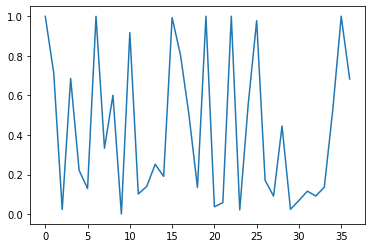

In [65]:
plt.plot(df_all['alpha'])

In [88]:
df_all['alpha'].median(),df_all['alpha'].mean(), np.sum(df_all['alpha'])/len(df_all['alpha'])

(0.25189256245049957, 0.4252726660499624, 0.4252726660499624)

In [66]:
high=tasks.induct_avg_split_high(tasks.induct_avg_all(data_dir))

In [79]:
df_all.query('subject == 102')['alpha']

2    0.022944
Name: alpha, dtype: float64

In [80]:
for h in high['participant']:
    print(df_all.query(f'subject == {h}')['alpha'])

2    0.022944
Name: alpha, dtype: float64
3    0.685405
Name: alpha, dtype: float64
5    0.129352
Name: alpha, dtype: float64
6    0.999671
Name: alpha, dtype: float64
9    0.001036
Name: alpha, dtype: float64
11    0.10185
Name: alpha, dtype: float64
13    0.251893
Name: alpha, dtype: float64
18    0.134295
Name: alpha, dtype: float64
20    0.036983
Name: alpha, dtype: float64
21    0.057918
Name: alpha, dtype: float64
26    0.170816
Name: alpha, dtype: float64
29    0.024244
Name: alpha, dtype: float64
30    0.069036
Name: alpha, dtype: float64
31    0.115856
Name: alpha, dtype: float64
32    0.091422
Name: alpha, dtype: float64
33    0.136294
Name: alpha, dtype: float64


In [93]:
param, logl = fit.fit_induct(struc_107, induc_107, {'alpha':0.3}, {'gamma','tau'}, 
                         {'gamma': [0, 1], 'tau': [0, 10]}, verbose=False)
logl

-28.859254903622137

In [94]:
param

{'alpha': 0.3, 'gamma': 0.354903910756183, 'tau': 0.09547135201217354}

In [95]:
# Fixed alpha 0.3
importlib.reload(fit)
subject_list = util.subj_list()
df_list = []
for sub in subject_list:
    subj_struct = struct_all.query(f'SubjNum == {sub}')
    subj_induct = induct_all.query(f'SubjNum == {sub}')
    # subj_struct = subj_struct.reset_index()
    # subj_induct = subj_induct.reset_index()
    fixed = {'alpha': 0.3}
    var_names = ['gamma', 'tau']
    var_bounds = {'gamma': [0, 1], 'tau': [0, 10]}
    try:
        param, logl = fit.fit_induct(subj_struct, subj_induct, fixed, var_names, 
                                 var_bounds, verbose=False)
        print(sub)
        param['subject']= sub
        param['log_like'] = logl
        df = pd.DataFrame(param,index=[0]) 
        df_list.append(df)
    except KeyError:
        pass


100
101
102
103
104
105
106
108
109
110
111
112
113
114
115
116
117
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
135
136
137
138


In [96]:
param, logl = fit.fit_induct(struc_107, induc_107, {'alpha':0.3}, {'gamma','tau'}, 
                         {'gamma': [0, 1], 'tau': [0, 10]}, verbose=False)
param['subject']= 107
param['log_like'] = logl
fixed_df_107 = pd.DataFrame(param,index=[0]) 
df_list.append(fixed_df_107)
fixed_df_all =  pd.concat(df_list)
fixed_df_all = fixed_df_all.sort_values(by=['subject'])
fixed_df_all.to_csv('/home/rodrigo/Documents/preston_labs/tesser_successor/fitting_fixed_alpha_0.3.csv')

In [101]:
fixed_df_all['gamma']

0    1.000000e+00
0    1.000000e+00
0    7.782629e-07
0    9.469529e-01
0    1.000000e+00
0    9.880588e-01
0    4.540782e-01
0    3.549032e-01
0    1.000000e+00
0    6.311004e-01
0    1.000000e+00
0    1.000000e+00
0    1.000000e+00
0    9.882912e-01
0    5.801810e-01
0    7.576753e-01
0    2.690246e-01
0    9.577254e-01
0    9.671386e-01
0    1.000000e+00
0    8.469306e-01
0    5.057220e-01
0    9.848089e-01
0    1.000000e+00
0    1.000000e+00
0    9.268911e-01
0    9.711414e-01
0    1.000000e+00
0    9.575592e-01
0    7.544895e-01
0    3.970292e-14
0    8.726203e-01
0    9.774761e-01
0    4.593631e-01
0    1.000000e+00
0    8.947521e-02
0    7.984466e-01
Name: gamma, dtype: float64

In [102]:
fixed = {}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
param, logl = fit.fit_induct(struct_all, induct_all, fixed, var_names, 
                                 var_bounds, verbose=False)
param,logl

({'gamma': 1.0, 'alpha': 0.0017224141272188492, 'tau': 0.37444213689133415},
 -1051.2923108602497)

In [104]:
param['log_like'] = logl
df = pd.DataFrame(param,index=[0]) 
df.to_csv('/home/rodrigo/Documents/preston_labs/tesser_successor/fitting_all.csv')

In [105]:
param, logl = fit.fit_induct(struct_all, induct_all, {'alpha':0.3}, {'gamma','tau'}, 
                         {'gamma': [0, 1], 'tau': [0, 10]}, verbose=False)
param,logl

({'alpha': 0.3, 'gamma': 0.7775991910128947, 'tau': 0.24866163059185664},
 -1064.1423263899692)

In [106]:
df = pd.DataFrame(param,index=[0]) 
df.to_csv('/home/rodrigo/Documents/preston_labs/tesser_successor/fitting_all_fixed_alpha_0.3.csv')